Notizen:
Vielleicht später interessant bezüglich nach Spatial Discretation
https://blog.devgenius.io/loading-poi-data-from-openstreetmap-using-overpass-api-b287ed809ed8

# Getting POI Data

In [1]:
import pandas as pd
import geopandas as gp
import osmnx as ox
import folium

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
tags = {'amenity': True}
all = ox.geometries_from_place(query = {'city': 'Chicago'}, tags=tags)

In [4]:
# Print different Types of POIs
print(all["amenity"].unique())

['ferry_terminal' 'parking' 'parking_entrance' 'post_box' 'loading_dock'
 'theatre' 'bicycle_parking' 'fast_food' 'post_office' 'drinking_water'
 'cafe' 'restaurant' 'pharmacy' 'fuel' 'cinema' 'fountain' 'clock' 'pub'
 'school' 'university' 'grave_yard' 'place_of_worship' 'driving_school'
 'kindergarten' 'music_school' 'dojo' 'college' 'language_school'
 'library' 'public_bath' 'social_centre' 'arts_centre' 'courthouse' 'bar'
 'social_facility' 'bank' 'atm' 'ice_cream' 'car_wash' 'veterinary'
 'doctors' 'bureau_de_change' 'dentist' 'community_centre' 'toilets'
 'recycling' 'bicycle_rental' 'bench' 'studio' 'taxi' 'car_sharing'
 'car_rental' 'money_transfer' 'waste_basket' 'research_institute'
 'shower' 'clinic' 'boat_rental' 'vending_machine' 'nightclub' 'books'
 'bicycle_repair_station' 'stripclub' 'shelter' 'events_venue' 'childcare'
 'charging_station' 'telephone' 'parking_space' 'animal_boarding' 'police'
 'marketplace' 'food_court' 'device_charging_station' 'payment_terminal'
 'ph

In [15]:
allDF = all[["amenity", "geometry", "name"]].reset_index().set_index("osmid").drop("element_type", axis = 1)
allDF

,amenity,geometry,name
osmid,,,
20217109,ferry_terminal,POINT (-87.62252 41.88915),Michigan Avenue Bridge Dock
20217237,ferry_terminal,POINT (-87.63177 41.88782),River North Water Taxi Terminal
20217442,ferry_terminal,POINT (-87.63778 41.87916),Willis Tower/Union Station Water Taxi Terminal
258490031,parking,POINT (-87.64385 41.95123),NaN
269449042,parking_entrance,POINT (-87.61506 41.85869),NaN
...,...,...,...
15596006,exhibition_centre,"MULTIPOLYGON (((-87.62206 41.84836, -87.62211 ...",McCormick Place
15607448,place_of_worship,"POLYGON ((-87.68250 41.74550, -87.68246 41.745...",NaN
15634307,university,"MULTIPOLYGON (((-87.62123 41.87938, -87.62192 ...",NaN


In [16]:
def getLatLong(row):
    if (row.geometry.geom_type == "Point"):
        return tuple([row.geometry.x, row.geometry.y])
    # For all POIs that are not only points, but polygons or multigons we return the center coordinates
    else:
        return tuple([row.geometry.centroid.x, row.geometry.centroid.y])

In [17]:
allDF["LatLong"] = allDF.apply(getLatLong, axis=1)

In [18]:
allDF

,amenity,geometry,name,LatLong
osmid,,,,
20217109,ferry_terminal,POINT (-87.62252 41.88915),Michigan Avenue Bridge Dock,"(-87.6225168, 41.8891458)"
20217237,ferry_terminal,POINT (-87.63177 41.88782),River North Water Taxi Terminal,"(-87.631768, 41.8878241)"
20217442,ferry_terminal,POINT (-87.63778 41.87916),Willis Tower/Union Station Water Taxi Terminal,"(-87.6377811, 41.8791638)"
258490031,parking,POINT (-87.64385 41.95123),NaN,"(-87.6438467, 41.9512273)"
269449042,parking_entrance,POINT (-87.61506 41.85869),NaN,"(-87.6150579, 41.8586894)"
...,...,...,...,...
15596006,exhibition_centre,"MULTIPOLYGON (((-87.62206 41.84836, -87.62211 ...",McCormick Place,"(-87.61586874048704, 41.84988398819726)"
15607448,place_of_worship,"POLYGON ((-87.68250 41.74550, -87.68246 41.745...",NaN,"(-87.68234372015652, 41.745519053169566)"
15634307,university,"MULTIPOLYGON (((-87.62123 41.87938, -87.62192 ...",NaN,"(-87.62514690846575, 41.88061721089818)"


In [57]:
allDF.to_pickle("../data/poi/poi.pickle")

In [58]:
allDF = pd.read_pickle("../data/poi/poi.pickle")

In [59]:
allDF.head()

,amenity,geometry,name,LatLong
osmid,,,,
20217109,ferry_terminal,POINT (-87.62252 41.88915),Michigan Avenue Bridge Dock,"(-87.6225168, 41.8891458)"
20217237,ferry_terminal,POINT (-87.63177 41.88782),River North Water Taxi Terminal,"(-87.631768, 41.8878241)"
20217442,ferry_terminal,POINT (-87.63778 41.87916),Willis Tower/Union Station Water Taxi Terminal,"(-87.6377811, 41.8791638)"
258490031,parking,POINT (-87.64385 41.95123),NaN,"(-87.6438467, 41.9512273)"
269449042,parking_entrance,POINT (-87.61506 41.85869),NaN,"(-87.6150579, 41.8586894)"


# Test Plots of POI Data

In [61]:
places = ["pub", "cafe", "restaurant"]
testDF = allDF[allDF["amenity"].isin(places)]
testDF = testDF.head(100)

In [62]:
m = folium.Map([41.88065, -87.62642], zoom_start=10)

for index, row in testDF.iterrows():
    if row["amenity"] == "cafe":
        folium.Marker(location=row["LatLong"][::-1], icon=folium.Icon(icon="mug-saucer", prefix='fa',color = "pink")).add_to(m)
    elif row["amenity"] == "restaurant":
        folium.Marker(location=row["LatLong"][::-1], icon=folium.Icon(icon="utensils", prefix='fa',color = "green")).add_to(m)
    else:
        folium.Marker(location=row["LatLong"][::-1], icon=folium.Icon(icon="beer", prefix='fa',color = "orange")).add_to(m)

m


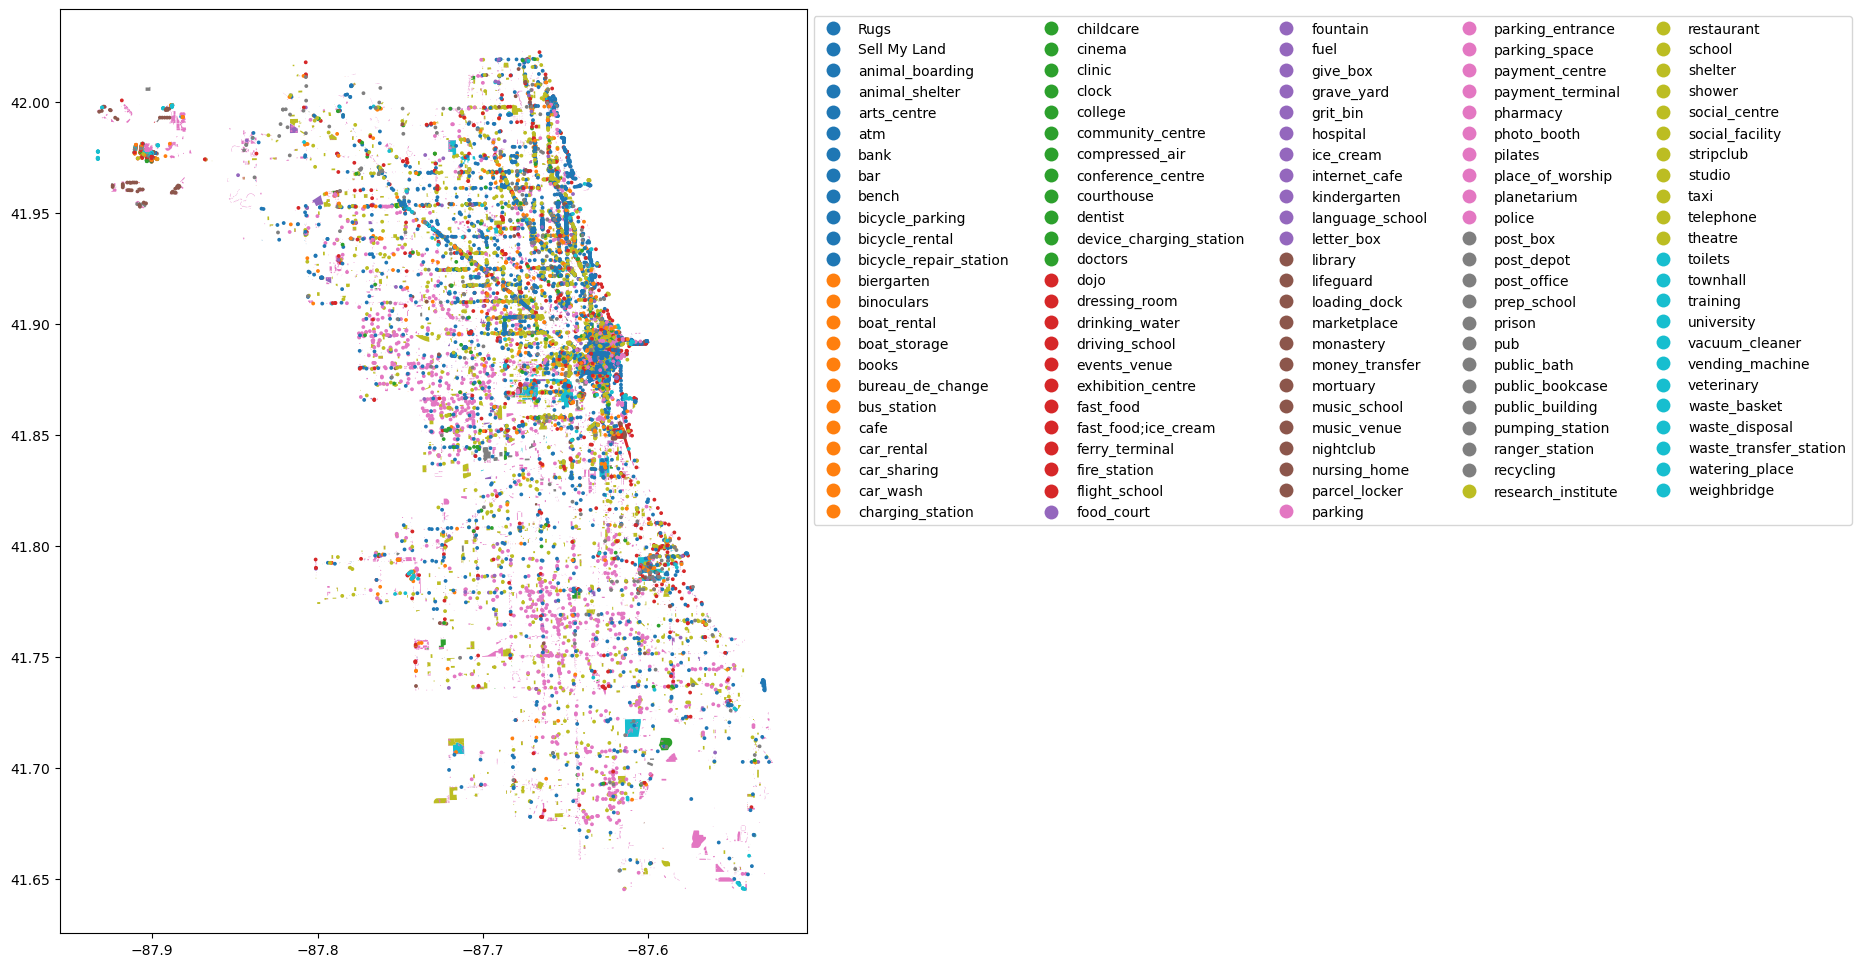

In [63]:
ax = allDF.plot(column='amenity', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))